In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import h5py
import imageio

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
f = h5py.File('/content/drive/MyDrive/pcam_train.h5', 'r')
f, list(f.keys())

(<HDF5 file "pcam_train.h5" (mode r)>, ['X', 'y'])

In [4]:
X = f['X'] 
y = f['y']
print(X.shape, y.shape)

(29491, 96, 96, 3) (29491,)


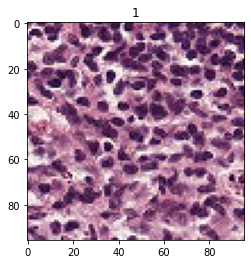

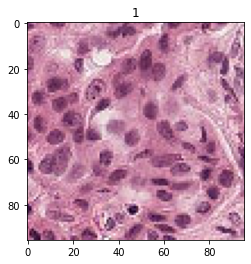

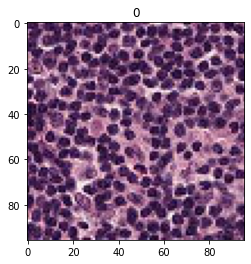

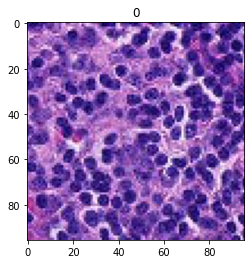

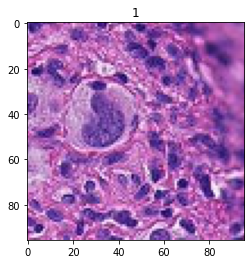

In [6]:
for i in range(5):
    plt.imshow(X[i])
    plt.title(y[i])
    plt.show()

In [7]:
X_train = tf.stack(X)
y_train = tf.stack(y)

In [8]:
X_train = tf.cast(X_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

In [17]:
X_train[0]

<tf.Tensor: shape=(96, 96, 3), dtype=float32, numpy=
array([[[ 91.,  37.,  71.],
        [120.,  68., 106.],
        [162., 116., 155.],
        ...,
        [ 63.,  21.,  61.],
        [ 55.,  20.,  50.],
        [ 73.,  43.,  69.]],

       [[141.,  92., 122.],
        [139.,  94., 125.],
        [237., 196., 230.],
        ...,
        [ 60.,  17.,  60.],
        [ 70.,  34.,  72.],
        [ 50.,  19.,  53.]],

       [[150., 110., 136.],
        [203., 168., 192.],
        [255., 238., 255.],
        ...,
        [115.,  70., 109.],
        [ 84.,  46.,  87.],
        [106.,  73., 116.]],

       ...,

       [[196., 148., 190.],
        [147., 100., 144.],
        [ 86.,  40.,  87.],
        ...,
        [230., 199., 204.],
        [255., 239., 244.],
        [255., 227., 232.]],

       [[175., 122., 152.],
        [228., 177., 210.],
        [145.,  97., 135.],
        ...,
        [228., 193., 200.],
        [240., 203., 211.],
        [197., 160., 168.]],

       [[159., 106.

In [9]:
lr = 3e-4
batch_size = 100
epochs = 5

model = tf.keras.Sequential(
    [
     layers.Conv2D(32,3,activation='relu',padding='same',name='conv1a'),
     layers.Conv2D(32,3,activation='relu',padding='same',name='conv1b'),
     layers.MaxPooling2D(2,2),
     layers.Conv2D(64,3,activation='relu',padding='same',name='conv2a'),
     layers.Conv2D(64,3,activation='relu',padding='same',name='conv2b'),
     layers.MaxPooling2D(2,2),
     layers.Conv2D(128,3,activation='relu',padding='same',name='conv3a'),
     layers.Conv2D(128,3,activation='relu',padding='same',name='conv3b'),
     layers.MaxPooling2D(2,2),
     layers.Flatten(),
     layers.Dense(1024,activation='relu',name='dense1'),
     layers.Dense(21,activation='softmax',name='z')
    ]
)

opt = tf.keras.optimizers.Adam(lr=lr)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics='accuracy')

history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1,verbose=True)

print(model.summary())

Epoch 1/5
266/266 [==============================] - 19s 72ms/step - loss: 1.9751 - accuracy: 0.7630 - val_loss: 0.4131 - val_accuracy: 0.8088
Epoch 2/5
266/266 [==============================] - 19s 70ms/step - loss: 0.3934 - accuracy: 0.8239 - val_loss: 0.4262 - val_accuracy: 0.8153
Epoch 3/5
266/266 [==============================] - 19s 71ms/step - loss: 0.3741 - accuracy: 0.8344 - val_loss: 0.3455 - val_accuracy: 0.8563
Epoch 4/5
266/266 [==============================] - 19s 72ms/step - loss: 0.3125 - accuracy: 0.8679 - val_loss: 0.3419 - val_accuracy: 0.8637
Epoch 5/5
266/266 [==============================] - 19s 72ms/step - loss: 0.2578 - accuracy: 0.8942 - val_loss: 0.3262 - val_accuracy: 0.8668
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1a (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
c

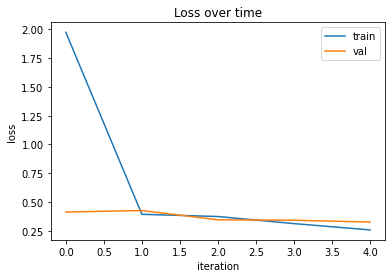

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Loss over time')
plt.legend(['train','val'])
plt.show()

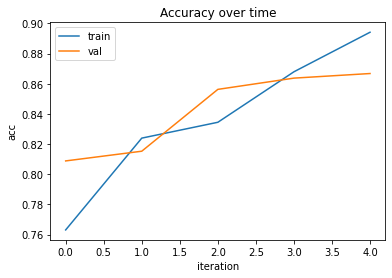

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('iteration')
plt.ylabel('acc')
plt.title('Accuracy over time')
plt.legend(['train','val'])
plt.show()

In [12]:
ft = h5py.File('/content/drive/MyDrive/pcam_test.h5', 'r')
ft, list(ft.keys())

(<HDF5 file "pcam_test.h5" (mode r)>, ['X', 'y'])

In [13]:
X_test = ft['X'] 
y_test = ft['y']
print(X_test.shape, y_test.shape)

(3277, 96, 96, 3) (3277,)


In [14]:
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [15]:
X_test = tf.cast(X_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)

In [16]:
results = model.evaluate(X_test, y_test)

103/103 [==============================] - 1s 8ms/step - loss: 0.3045 - accuracy: 0.8740
